# 套件

In [1]:
import re
import pandas as pd
import nltk
from collections import Counter
from nltk.tokenize import MWETokenizer
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 匯入twitter貼文

In [114]:
tweets = pd.read_csv('/Users/Rebeca/Downloads/positive_news.csv')

# 使用NLTK做NER，並取出有意義的字詞

> https://www.itread01.com/article/1529980432.html

In [230]:
#自定義字典
tokenizer = MWETokenizer([('Dow', 'Jones', 'Industrial', 'Average')], separator = ' ')
tokenizer.add_mwe(('Dow', 'Jones', 'Industrial', 'Average'))


tokenized_sentences = []
for i in tweets['original_text']:
    #sentences = parse_document(i)
    #for sentence in sentences:
    
    #token = tokenizer.tokenize(nltk.word_tokenize(i))
    
    token = nltk.word_tokenize(i)
    tokenized_sentences.append(token)
        
        
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]  #nltk.pos_tag(sentence)詞性標記
ne_chunked_sents = [nltk.ne_chunk(tagged) for tagged in tagged_sentences]



# extract all named entities
named_entities = []
remain_word=[]
for ne_tagged_sentence in ne_chunked_sents:
    for tagged_tree in ne_tagged_sentence:
       # extract only chunks having NE labels
        if hasattr(tagged_tree, 'label'): #hasattr判斷tagged_tree是否有label屬性(是否有被標記)
            entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) #get NE name
            entity_type = tagged_tree.label() # get NE category
            remain_word.append(entity_name)
            named_entities.append((entity_name, entity_type))
            # get unique named entities
            #named_entitiess = list(set(named_entities))

            
# store named entities in a data frame
entity_frame = pd.DataFrame(named_entities, columns=['Entity Name', 'Entity Type'])
entity_frame

,Entity Name,Entity Type
0,American,GPE
1,Seattle,GPE
2,Dow Jones Industrial,ORGANIZATION
3,Dow Jones Industrial Average,ORGANIZATION
4,Capitol Hill,PERSON
5,NCAA,ORGANIZATION
6,Ben Brown,PERSON
7,Dow Jones Industrial Average,PERSON
8,Dow,ORGANIZATION
9,Nasdaq,ORGANIZATION


In [126]:
Counter(remain_word)

Counter({'American': 11,
         'Seattle': 11,
         'Dow Jones Industrial': 54,
         'Dow Jones Industrial Average': 535,
         'Capitol Hill': 11,
         'NCAA': 11,
         'Ben Brown': 11,
         'Dow': 190,
         'Nasdaq': 51,
         'SPDR Dow Jones Industrial Average': 16,
         'DIA': 52,
         'Dow Jones': 84,
         'Close Week': 22,
         'Losses': 32,
         'U.S.': 178,
         'NavyCapital': 11,
         'Stocks': 44,
         'Donald Trump': 22,
         'DowJ': 11,
         'Jones Industrial Average': 48,
         'Nasdaq Composite': 150,
         'News': 27,
         'Noticia': 27,
         'Bitcoin': 27,
         'CryptoCurrency': 27,
         'Forex': 27,
         'Apple': 23,
         'Home Depot': 11,
         'Boeing': 20,
         'SPDR': 36,
         'BACK': 10,
         'DEADLY': 10,
         'REAL': 10,
         'DOW': 12,
         'USNews': 10,
         'USRC': 10,
         'Trade': 10,
         'Are': 10,
         'Week': 1

In [127]:
'Dow Jones Industrial Average' in remain_word

True

In [233]:
#計算每個字詞出現的次數
print(Counter(remain_word))

Counter({'Dow Jones Industrial Average': 535, 'Dow': 190, 'U.S.': 178, 'Nasdaq Composite': 150, 'Dow Jones': 84, 'Oil Prices Crash': 58, 'Below Zero': 58, 'Dow Jones Industrial': 54, 'DIA': 52, 'DJIA': 52, 'Nasdaq': 51, 'Oil': 50, 'First Time': 50, 'Jones Industrial Average': 48, 'Stocks': 44, 'Ends Down': 38, 'SPDR': 36, 'Losses': 32, 'News': 27, 'Noticia': 27, 'Bitcoin': 27, 'CryptoCurrency': 27, 'Forex': 27, 'Sam Houston': 27, 'Rout': 26, 'Apple': 23, 'Close Week': 22, 'Donald Trump': 22, 'Boeing': 20, 'MarketWatch Market': 20, 'Report Says Gilead': 17, 'Remdesivir Disappoints': 17, 'Street': 17, 'SPDR Dow Jones Industrial Average': 16, 'McDonald': 16, 'Wall Street': 15, 'Oil Markets Deepens': 15, 'Rebound': 14, 'Oil Prices Make Sharp Move Higher': 14, 'Trump': 14, 'United Health': 13, 'Own Barrels': 13, 'Futures': 13, 'DOW': 12, 'American': 11, 'Seattle': 11, 'Capitol Hill': 11, 'NCAA': 11, 'Ben Brown': 11, 'NavyCapital': 11, 'DowJ': 11, 'Home Depot': 11, 'Markets Continues': 11, '

# 稀疏矩陣

In [128]:
names = {}          
relationships = {}  
lineNames = []  

for ne_tagged_sentence in ne_chunked_sents:
    lineNames.append([])
    for tagged_tree in ne_tagged_sentence:
   # extract only chunks having NE labels
        if hasattr(tagged_tree, 'label'): #hasattr判斷tagged_tree是否有label屬性(是否有被標記)
            entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) #get NE name
            entity_type = tagged_tree.label() # get NE category
            lineNames[-1].append(entity_name)
            if names.get(entity_name) is None:    
                relationships[entity_name] = {} 

            

In [170]:
term_dic = dict()
for sentence in lineNames:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}

In [175]:
for i in range(len(lineNames)):
    for term1 in term_dic:
        num = 0
        for term2 in lineNames[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][i] = num

In [180]:
TDM = pd.DataFrame.from_dict(term_dic)
TDM

,American,Seattle,Dow Jones Industrial,Dow Jones Industrial Average,Capitol Hill,NCAA,Ben Brown,Dow,Nasdaq,SPDR Dow Jones Industrial Average,...,MarketwithPM,MoneyControl,Disruption,Modern Cantillon Era,Market History,Wall St,Main St,VIX,WANTED,Stone
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
len(TDM)

175

# Co-Occurrence Matrix

In [181]:
names = {}          
relationships = {}  
lineNames = []  

for ne_tagged_sentence in ne_chunked_sents:
    lineNames.append([])
    for tagged_tree in ne_tagged_sentence:
   # extract only chunks having NE labels
        if hasattr(tagged_tree, 'label'): #hasattr判斷tagged_tree是否有label屬性(是否有被標記)
            entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) #get NE name
            #entity_type = tagged_tree.label() # get NE category
            lineNames[-1].append(entity_name)
            if names.get(entity_name) is None:    #names好像沒起到作用
                names[entity_name] = 0
                relationships[entity_name] = {}
                names[entity_name] += 1  
for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 15]
            

In [194]:
co_occur_by_records

[['SPDR Dow Jones Industrial Average', 'DIA', 16],
 ['MarketWatch Market', 'Sam Houston', 20],
 ['DJIA', 'Sam Houston', 27],
 ['Dow Jones Industrial', 'U.S.', 27],
 ['Dow', 'Dow Jones Industrial Average', 35],
 ['Jones Industrial Average', 'Sam Houston', 27],
 ['Jones Industrial Average', 'DJIA', 27],
 ['Boeing', 'Dow Jones Industrial Average', 20],
 ['Forex', 'Dow Jones Industrial', 27],
 ['CryptoCurrency', 'Noticia', 27],
 ['Dow Jones Industrial Average', 'Dow', 35],
 ['News', 'Forex', 27],
 ['Oil Prices Crash', 'Below Zero', 66],
 ['Dow Jones Industrial', 'CryptoCurrency', 27],
 ['Dow Jones Industrial Average', 'SPDR', 36],
 ['DIA', 'Dow Jones Industrial Average', 36],
 ['U.S.', 'Dow Jones Industrial', 27],
 ['Below Zero', 'First Time', 54],
 ['Nasdaq Composite', 'Dow', 21],
 ['News', 'Noticia', 27],
 ['Below Zero', 'Ends Down', 38],
 ['Dow', 'Ends Down', 38],
 ['Bitcoin', 'Noticia', 27],
 ['Dow', 'Oil', 17],
 ['CryptoCurrency', 'Forex', 27],
 ['Below Zero', 'Oil Prices Crash', 66],

In [184]:
np.random.shuffle(co_occur_by_records)  #打亂list順序
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]  #df.at[列,行]=放置的字
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix: #temp_matrix的欄位
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j] 
co_occurrence_matrix_by_records.head()

,DIA,Sam Houston,U.S.,Dow Jones Industrial Average,DJIA,Dow Jones Industrial,Noticia,Dow,Forex,Below Zero,...,Stocks,Jones Industrial Average,Nasdaq Composite,Nasdaq,Ben Brown,Donald Trump,Close Week,Remdesivir Disappoints,Losses,Apple
DIA,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam Houston,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,...,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U.S.,NaN,NaN,NaN,128.0,NaN,27.0,27.0,NaN,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dow Jones Industrial Average,36.0,NaN,128.0,NaN,NaN,NaN,NaN,35.0,NaN,NaN,...,NaN,NaN,140.0,51.0,NaN,NaN,NaN,NaN,NaN,23.0
DJIA,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:

def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

# 共線圖

> * https://networkx.github.io/documentation/networkx-1.7/tutorial/tutorial.html#drawing-graphs
* https://python-graph-gallery.com/network-chart/
* https://github.com/syuan0624/FinTech/blob/master/HW2/TDM%2C%20CO-occurrence%20Matrix%2C%20%E5%85%B1%E7%B7%9A%E5%9C%96%20.ipynb

In [226]:
g.nodes()

NodeView(('SPDR Dow Jones Industrial Average', 'DIA', 'MarketWatch Market', 'Sam Houston', 'DJIA', 'Dow Jones Industrial', 'U.S.', 'Dow', 'Dow Jones Industrial Average', 'Jones Industrial Average', 'Boeing', 'Forex', 'CryptoCurrency', 'Noticia', 'News', 'Oil Prices Crash', 'Below Zero', 'SPDR', 'First Time', 'Nasdaq Composite', 'Ends Down', 'Bitcoin', 'Oil', 'Remdesivir Disappoints', 'Report Says Gilead', 'Apple', 'McDonald', 'Donald Trump', 'Stocks', 'Nasdaq', 'Ben Brown', 'Losses', 'Close Week'))

In [222]:
pos

{'SPDR Dow Jones Industrial Average': array([ 0.02362485, -0.50378728]),
 'DIA': array([ 0.05243385, -0.31510924]),
 'MarketWatch Market': array([-0.87943327,  0.31077769]),
 'Sam Houston': array([-0.87008264,  0.24426558]),
 'DJIA': array([-0.9768861 ,  0.28795003]),
 'Dow Jones Industrial': array([ 0.39388916, -0.08714932]),
 'U.S.': array([ 0.28427021, -0.13048872]),
 'Dow': array([0.00503341, 0.15192954]),
 'Dow Jones Industrial Average': array([ 0.07024806, -0.1109348 ]),
 'Jones Industrial Average': array([-0.92588017,  0.22266294]),
 'Boeing': array([-0.07553259, -0.22441209]),
 'Forex': array([ 0.38202893, -0.13292887]),
 'CryptoCurrency': array([ 0.43746592, -0.09808481]),
 'Noticia': array([ 0.44726013, -0.14164313]),
 'News': array([ 0.43188495, -0.18553934]),
 'Oil Prices Crash': array([-0.04902081,  0.23117334]),
 'Below Zero': array([0.00578935, 0.23751442]),
 'SPDR': array([ 0.08496021, -0.24838518]),
 'First Time': array([0.00209209, 0.28037459]),
 'Nasdaq Composite': a

In [223]:
g.degree()

DegreeView({'SPDR Dow Jones Industrial Average': 1, 'DIA': 3, 'MarketWatch Market': 3, 'Sam Houston': 3, 'DJIA': 3, 'Dow Jones Industrial': 6, 'U.S.': 7, 'Dow': 9, 'Dow Jones Industrial Average': 9, 'Jones Industrial Average': 3, 'Boeing': 2, 'Forex': 6, 'CryptoCurrency': 6, 'Noticia': 6, 'News': 6, 'Oil Prices Crash': 4, 'Below Zero': 4, 'SPDR': 2, 'First Time': 4, 'Nasdaq Composite': 2, 'Ends Down': 4, 'Bitcoin': 6, 'Oil': 1, 'Remdesivir Disappoints': 1, 'Report Says Gilead': 1, 'Apple': 2, 'McDonald': 1, 'Donald Trump': 1, 'Stocks': 2, 'Nasdaq': 3, 'Ben Brown': 1, 'Losses': 1, 'Close Week': 1})

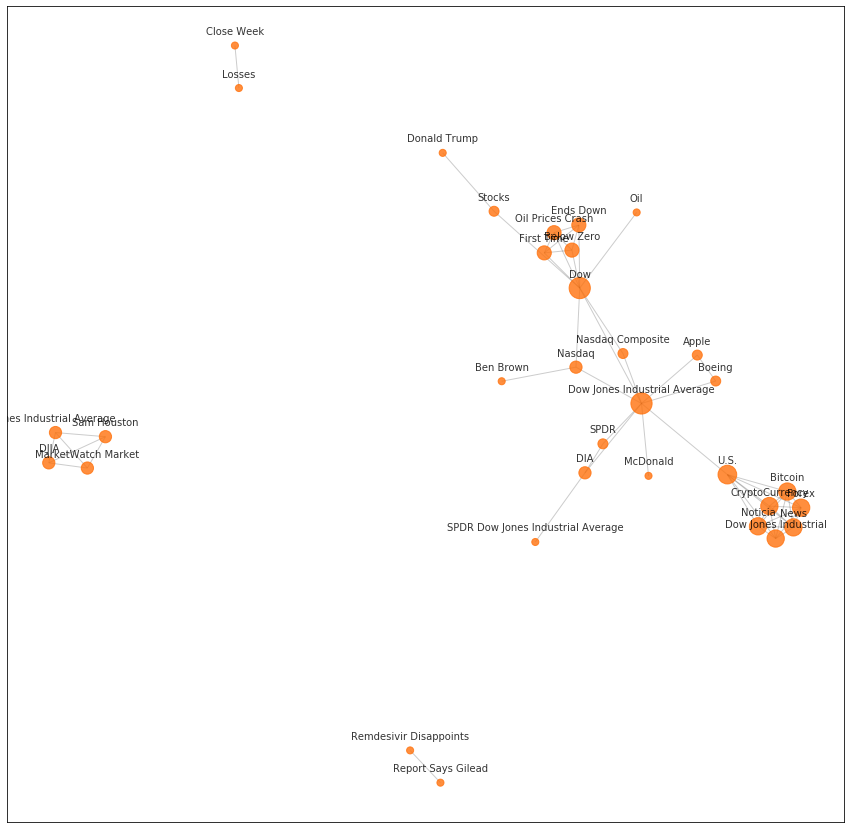

In [228]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#ff720d')
nx.draw_networkx_edges(g, pos, node_color='c', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 10, font_family='sans-serif', alpha=0.8)
#plt.title('以每筆通聯紀錄為一句', size = 14)
#plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

# 熱度圖

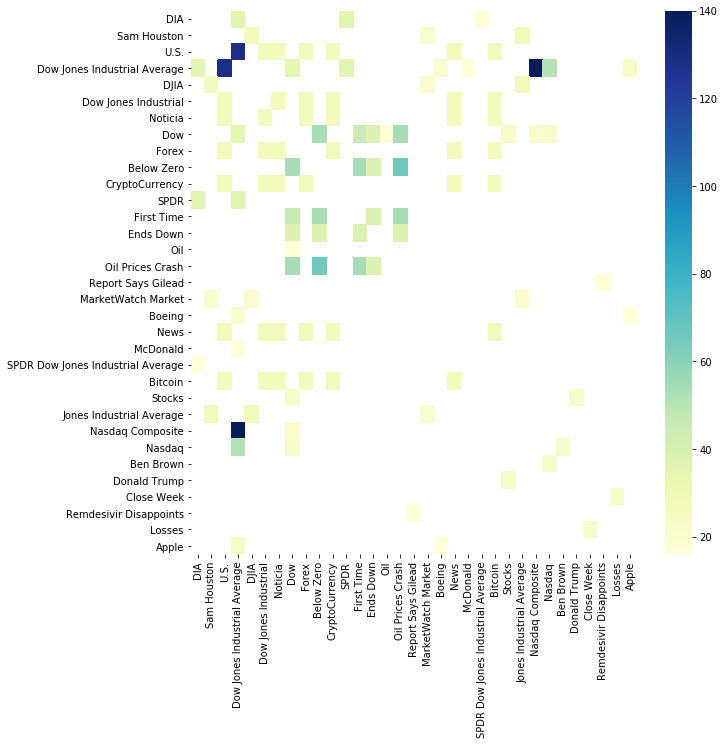

In [229]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')
#plt.title('以每筆通聯紀錄為一句', size = 14)
#plt.suptitle('用詞熱度圖',x = 0.435,y=0.95, fontsize=18)
#plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()